In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import atlite
import numpy as np
import logging 
logging.basicConfig(level=logging.INFO)

In [23]:
from bias_correction import bias_factor_era5_sarah
bias_factor_era5_sarah_rsds=bias_factor_era5_sarah('influx_diffuse')

['/groups/EXTREMES/cutouts/europe-1996-era5.nc', '/groups/EXTREMES/cutouts/europe-2010-era5.nc', '/groups/EXTREMES/cutouts/europe-2012-era5.nc', '/groups/EXTREMES/cutouts/europe-2010-era5.nc']
['/groups/EXTREMES/SARAH-3/europe-1996-sarah3-era5.nc', '/groups/EXTREMES/SARAH-3/europe-2010-sarah3-era5.nc', '/groups/EXTREMES/SARAH-3/europe-2012-sarah3-era5.nc', '/groups/EXTREMES/SARAH-3/europe-2010-sarah3-era5.nc']
189 190
157 158
157 158
131 132


/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/xesmf/frontend.py:718: UserWarning: Using dimensions ('y', 'x') from data variable influx_diffuse as the horizontal dimensions for the regridding.
  warnings.warn(


In [24]:
# Calculate the mean of the bias_factor_era5_sarah_rsds
mean_value = bias_factor_era5_sarah_rsds.mean()

# Print the mean value
print(mean_value)

1.1457453


In [2]:

ds_s=xr.open_dataset("/groups/EXTREMES/SARAH-3/europe-1996-sarah3-era5.nc")
ds_s

<xarray.Dataset> Size: 13GB
Dimensions:           (x: 177, y: 131, time: 8784)
Coordinates:
  * x                 (x) float64 1kB -12.0 -11.7 -11.4 -11.1 ... 40.2 40.5 40.8
  * y                 (y) float64 1kB 33.0 33.3 33.6 33.9 ... 71.4 71.7 72.0
  * time              (time) datetime64[ns] 70kB 1996-01-01 ... 1996-12-31T23...
    lon               (x) float64 1kB ...
    lat               (y) float64 1kB ...
Data variables: (12/13)
    influx_direct     (time, y, x) float32 815MB ...
    influx_diffuse    (time, y, x) float32 815MB ...
    solar_altitude    (time, y, x) float64 2GB ...
    solar_azimuth     (time, y, x) float64 2GB ...
    height            (y, x) float32 93kB ...
    wnd100m           (time, y, x) float32 815MB ...
    ...                ...
    roughness         (time, y, x) float32 815MB ...
    influx_toa        (time, y, x) float32 815MB ...
    albedo            (time, y, x) float32 815MB ...
    temperature       (time, y, x) float64 2GB ...
    soil temperature  (time, y, x) float64 2GB ...
    runoff            (time, y, x) float32 815MB ...
Attributes: (12/48)
    module:                     ['sarah', 'era5']
    prepared_features:          ['height', 'influx', 'runoff', 'temperature',...
    chunksize_lat:              -1
    chunksize_time:             100
    sarah_dir:                  ../sarah/data/sarah-3-1996
    dx:                         0.3
    ...                         ...
    variable_id:                SIS
    license:                    The CM SAF data are owned by EUMETSAT and are...
    title:                      CM SAF Surface Solar Radiation Climate Data R...
    summary:                    This file contains data from the CM SAF Surfa...
    history:                    2022-07-02 15:25:14 GMT by grib_to_netcdf-2.2...
    CDO:                        Climate Data Operators version 2.4.0 (https:/...

In [11]:
import pandas as pd

# Assuming ds_s['influx_direct'] is an xarray DataArray
specific_time = '1996-01-01T10:00:00'
specific_lon = 12.34  # Replace with the desired longitude
specific_lat = 40.78  # Replace with the desired latitude

# Filter the DataArray for the specific time and location
filtered_data = ds_s['influx_direct'].sel(
    time=specific_time, x=specific_lon, y=specific_lat, method='nearest'
)

print(filtered_data.values)

296.75


In [13]:
ds=xr.open_dataset("/groups/EXTREMES/cutouts/europe-1996-era5.nc")
ds

<xarray.Dataset> Size: 17GB
Dimensions:           (x: 189, y: 157, time: 8784)
Coordinates:
  * x                 (x) float64 2kB -12.0 -11.75 -11.5 ... 34.5 34.75 35.0
  * y                 (y) float64 1kB 33.0 33.25 33.5 33.75 ... 71.5 71.75 72.0
  * time              (time) datetime64[ns] 70kB 1996-01-01 ... 1996-12-31T23...
    lon               (x) float64 2kB ...
    lat               (y) float64 1kB ...
Data variables: (12/13)
    height            (y, x) float32 119kB ...
    wnd100m           (time, y, x) float32 1GB ...
    wnd_azimuth       (time, y, x) float32 1GB ...
    roughness         (time, y, x) float32 1GB ...
    influx_toa        (time, y, x) float32 1GB ...
    influx_direct     (time, y, x) float32 1GB ...
    ...                ...
    albedo            (time, y, x) float32 1GB ...
    solar_altitude    (time, y, x) float64 2GB ...
    solar_azimuth     (time, y, x) float64 2GB ...
    temperature       (time, y, x) float64 2GB ...
    soil temperature  (time, y, x) float64 2GB ...
    runoff            (time, y, x) float32 1GB ...
Attributes:
    module:             era5
    prepared_features:  ['wind', 'runoff', 'influx', 'height', 'temperature']
    chunksize_time:     100
    Conventions:        CF-1.6
    history:            2023-02-20 20:19:56 GMT by grib_to_netcdf-2.25.1: /op...

In [15]:
# Assuming ds_s['influx_direct'] is an xarray DataArray
specific_time = '1996-01-01T10:00:00'
specific_lon = 12.34  # Replace with the desired longitude
specific_lat = 40.78  # Replace with the desired latitude

# Filter the DataArray for the specific time and location
filtered_data_era5 = ds['influx_direct'].sel(
    time=specific_time, x=specific_lon, y=specific_lat, method='nearest'
)

print(filtered_data_era5.values)

208.11041


In [7]:
fn_had_LL="/groups/FutureWind/SFCRAD/HadGEM3-GC31-LL/historical/r1i1p1f3/rsds_3hr_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_200001010130-201412302230.nc"
ds_had_LL = xr.open_dataset(fn_had_LL)
# Access the time_bnds variable
time_bnds_had_LL = ds_had_LL['time_bnds']

# Display the time_bnds variable
time_bnds_had_LL.values

array([[cftime.Datetime360Day(2000, 1, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.Datetime360Day(2000, 1, 1, 3, 0, 0, 0, has_year_zero=True)],
       [cftime.Datetime360Day(2000, 1, 1, 3, 0, 0, 0, has_year_zero=True),
        cftime.Datetime360Day(2000, 1, 1, 6, 0, 0, 0, has_year_zero=True)],
       [cftime.Datetime360Day(2000, 1, 1, 6, 0, 0, 0, has_year_zero=True),
        cftime.Datetime360Day(2000, 1, 1, 9, 0, 0, 0, has_year_zero=True)],
       ...,
       [cftime.Datetime360Day(2014, 12, 30, 15, 0, 0, 0, has_year_zero=True),
        cftime.Datetime360Day(2014, 12, 30, 18, 0, 0, 0, has_year_zero=True)],
       [cftime.Datetime360Day(2014, 12, 30, 18, 0, 0, 0, has_year_zero=True),
        cftime.Datetime360Day(2014, 12, 30, 21, 0, 0, 0, has_year_zero=True)],
       [cftime.Datetime360Day(2014, 12, 30, 21, 0, 0, 0, has_year_zero=True),
        cftime.Datetime360Day(2015, 1, 1, 0, 0, 0, 0, has_year_zero=True)]],
      dtype=object)

In [3]:
fn_esm2="/groups/FutureWind/SFCRAD/MRI-ESM2-0/historical/r1i1p1f1/rsds_3hr_MRI-ESM2-0_historical_r1i1p1f1_gn_198001010130-198912312230.nc"
ds_esm2 = xr.open_dataset(fn_esm2)
ds_esm2

<xarray.Dataset> Size: 6GB
Dimensions:    (time: 29224, bnds: 2, lat: 160, lon: 320)
Coordinates:
  * time       (time) datetime64[ns] 234kB 1980-01-01T01:30:00 ... 1989-12-31...
  * lat        (lat) float64 1kB -89.14 -88.03 -86.91 ... 86.91 88.03 89.14
  * lon        (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 356.6 357.8 358.9
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 468kB ...
    lat_bnds   (lat, bnds) float64 3kB ...
    lon_bnds   (lon, bnds) float64 5kB ...
    rsds       (time, lat, lon) float32 6GB ...
Attributes: (12/44)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-06-18T10:04:19Z
    ...                     ...
    title:                  MRI-ESM2-0 output prepared for CMIP6
    variable_id:            rsds
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MRI is licensed unde...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/fd54d0b7-454e-4ad2-bd5d-0d6a6edbcad6

In [6]:
# Access the time_bnds variable
time_bnds = ds_esm2['time_bnds']

# Display the time_bnds variable
time_bnds.values

array([['1980-01-01T00:00:00.000000000', '1980-01-01T03:00:00.000000000'],
       ['1980-01-01T03:00:00.000000000', '1980-01-01T06:00:00.000000000'],
       ['1980-01-01T06:00:00.000000000', '1980-01-01T09:00:00.000000000'],
       ...,
       ['1989-12-31T15:00:00.000000000', '1989-12-31T18:00:00.000000000'],
       ['1989-12-31T18:00:00.000000000', '1989-12-31T21:00:00.000000000'],
       ['1989-12-31T21:00:00.000000000', '1990-01-01T00:00:00.000000000']],
      dtype='datetime64[ns]')

In [8]:
fn_can="/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_3hr_CanESM5_historical_r1i1p2f1_gn_198101010130-199012312230.nc"
ds_can= xr.open_dataset(fn_can)
ds_can
time_bnds_can = ds_can['time_bnds']

# Display the time_bnds variable
time_bnds_can.values

array([[cftime.DatetimeNoLeap(1981, 1, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(1981, 1, 1, 3, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(1981, 1, 1, 3, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(1981, 1, 1, 6, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(1981, 1, 1, 6, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(1981, 1, 1, 9, 0, 0, 0, has_year_zero=True)],
       ...,
       [cftime.DatetimeNoLeap(1990, 12, 31, 15, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(1990, 12, 31, 18, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(1990, 12, 31, 18, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(1990, 12, 31, 21, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(1990, 12, 31, 21, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(1991, 1, 1, 0, 0, 0, 0, has_year_zero=True)]],
      dtype=object)

In [9]:
fn_cmcc_esm2="/groups/FutureWind/SFCRAD/CMCC-ESM2/historical/r1i1p1f1/rsds_3hr_CMCC-ESM2_historical_r1i1p1f1_gn_198001010130-198412312230.nc"
ds_cmcc_esm2 = xr.open_dataset(fn_cmcc_esm2)
ds_cmcc_esm2
time_bnds_cmcc_esm2 = ds_cmcc_esm2['time_bnds']
time_bnds_cmcc_esm2.values

array([[cftime.DatetimeNoLeap(1980, 1, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(1980, 1, 1, 3, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(1980, 1, 1, 3, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(1980, 1, 1, 6, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(1980, 1, 1, 6, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(1980, 1, 1, 9, 0, 0, 0, has_year_zero=True)],
       ...,
       [cftime.DatetimeNoLeap(1984, 12, 31, 15, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(1984, 12, 31, 18, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(1984, 12, 31, 18, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(1984, 12, 31, 21, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(1984, 12, 31, 21, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(1985, 1, 1, 0, 0, 0, 0, has_year_zero=True)]],
      dtype=object)

In [10]:
fn_cmccsr5="/groups/FutureWind/SFCRAD/CMCC-CM2-SR5/historical/r1i1p1f1/rsds_3hr_CMCC-CM2-SR5_historical_r1i1p1f1_gn_198001010130-198412312230.nc"
ds_cmccsr5 = xr.open_dataset(fn_cmccsr5)
ds_cmccsr5
time_bnds_cmccsr5 = ds_cmccsr5['time_bnds']
time_bnds_cmccsr5.values

array([[cftime.DatetimeNoLeap(1980, 1, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(1980, 1, 1, 3, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(1980, 1, 1, 3, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(1980, 1, 1, 6, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(1980, 1, 1, 6, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(1980, 1, 1, 9, 0, 0, 0, has_year_zero=True)],
       ...,
       [cftime.DatetimeNoLeap(1984, 12, 31, 15, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(1984, 12, 31, 18, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(1984, 12, 31, 18, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(1984, 12, 31, 21, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(1984, 12, 31, 21, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(1985, 1, 1, 0, 0, 0, 0, has_year_zero=True)]],
      dtype=object)

In [11]:
fn_access="/groups/FutureWind/SFCRAD/ACCESS-CM2/historical/r1i1p1f1/rsds_3hr_ACCESS-CM2_historical_r1i1p1f1_gn_198001010130-198912312230.nc"
ds_access= xr.open_dataset(fn_access)
ds_access
time_bnds_access = ds_access['time_bnds']
time_bnds_access.values

array([['1980-01-01T00:00:00.000000000', '1980-01-01T03:00:00.000000000'],
       ['1980-01-01T03:00:00.000000000', '1980-01-01T06:00:00.000000000'],
       ['1980-01-01T06:00:00.000000000', '1980-01-01T09:00:00.000000000'],
       ...,
       ['1989-12-31T15:00:00.000000000', '1989-12-31T18:00:00.000000000'],
       ['1989-12-31T18:00:00.000000000', '1989-12-31T21:00:00.000000000'],
       ['1989-12-31T21:00:00.000000000', '1990-01-01T00:00:00.000000000']],
      dtype='datetime64[ns]')

In [26]:
ds_had_LL


<xarray.Dataset> Size: 5GB
Dimensions:    (time: 43200, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) object 346kB 2000-01-01 01:30:00 ... 2014-12-30 22:30:00
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 691kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    rsds       (time, lat, lon) float32 5GB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2020-10-24T19:27:10Z
    ...                     ...
    tracking_id:            hdl:21.14100/98064a9d-e8bd-40eb-986c-c8ff75d73f99
    variable_id:            rsds
    variable_name:          rsds
    variant_label:          r1i1p1f3
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0

In [5]:
print(ds_had_LL['time'].attrs.get('units'))

None


In [7]:
print(ds_had_LL['time'].values)

[cftime.Datetime360Day(2000, 1, 1, 1, 30, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(2000, 1, 1, 4, 30, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(2000, 1, 1, 7, 30, 0, 0, has_year_zero=True) ...
 cftime.Datetime360Day(2014, 12, 30, 16, 30, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(2014, 12, 30, 19, 30, 0, 0, has_year_zero=True)
 cftime.Datetime360Day(2014, 12, 30, 22, 30, 0, 0, has_year_zero=True)]


In [27]:
fn_era5_1996="/groups/EXTREMES/cutouts/europe-1996-era5.nc"
ds_era5_1996=xr.open_dataset(fn_era5_1996, decode_times=True, use_cftime=True)
ds_era5_1996
ds_era5_1996['height'].values

/tmp/ipykernel_60135/1945649128.py:2: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  ds_era5_1996=xr.open_dataset(fn_era5_1996, decode_times=True, use_cftime=True)


array([[ 8.35689306e-01,  1.06512547e+00, -5.40927589e-01, ...,
        -1.49186268e+01,  2.62643642e+01,  1.12913155e+02],
       [-8.46842408e-01, -1.03803921e+00, -3.11491430e-01, ...,
        -1.49691153e+00,  2.23859578e-01,  2.20963745e+01],
       [ 7.97449946e-01, -8.20552856e-02,  9.50407386e-01, ...,
         5.29774427e-01,  6.11262083e+00,  2.45054531e+01],
       ...,
       [-6.93885028e-01, -6.93885028e-01, -6.93885028e-01, ...,
         4.15056348e-01,  1.47380859e-01, -3.87970150e-01],
       [ 4.53295708e-01,  1.40927970e+00,  9.50407386e-01, ...,
        -1.20294645e-01, -1.58534005e-01, -1.96773365e-01],
       [-1.20294645e-01,  7.59210587e-01,  3.00338298e-01, ...,
        -2.73252070e-01,  2.62098938e-01,  2.62098938e-01]], dtype=float32)

In [28]:
filename2="/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/europe-2013.nc"
ds_era5_2013=xr.open_dataset(filename2, decode_times=True, use_cftime=True)
ds_era5_2013
ds_era5_2013['height'].values

/tmp/ipykernel_60135/1073149446.py:2: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  ds_era5_2013=xr.open_dataset(filename2, decode_times=True, use_cftime=True)


array([[ 8.4948134e-01,  1.0578061e+00, -5.4625517e-01, ...,
         6.7603503e+02,  6.3004266e+02,  5.8004468e+02],
       [-8.3544034e-01, -1.0310187e+00, -2.9570773e-01, ...,
         6.4224817e+02,  6.0093573e+02,  5.6032434e+02],
       [ 7.8973234e-01, -9.0569519e-02,  9.6101278e-01, ...,
         5.7883496e+02,  5.5034943e+02,  5.1470795e+02],
       ...,
       [-6.7849964e-01, -7.0120424e-01, -7.0040762e-01, ...,
        -3.1881067e-01,  4.6056516e-02,  4.1172037e-01],
       [ 4.6708778e-01,  1.4178934e+00,  9.5304626e-01, ...,
        -1.7277418e-02, -7.3068041e-01, -1.1118790e+00],
       [-1.3597876e-01,  7.4551809e-01,  2.8903577e-01, ...,
        -1.0134923e+00, -5.2195728e-01, -1.0904192e-02]], dtype=float32)

In [2]:
fn_rsds="/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_3hr_CanESM5_historical_r1i1p2f1_gn_201101010130-201412312230.nc"
ds_rsds=xr.open_dataset(fn_rsds,decode_times=True, use_cftime=True)
fn_rsdsddiff="/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsdsdiff_3hr_CanESM5_historical_r1i1p2f1_gn_201101010130-201412312230.nc"
ds_rsdsdiff=xr.open_dataset(fn_rsdsddiff,decode_times=True, use_cftime=True)
fn_tas="/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/tas_3hr_CanESM5_historical_r1i1p2f1_gn_201101010300-201501010000.nc"
ds_tas=xr.open_dataset(fn_tas,decode_times=True, use_cftime=True)

/tmp/ipykernel_60135/2206843013.py:2: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  ds_rsds=xr.open_dataset(fn_rsds,decode_times=True, use_cftime=True)
/tmp/ipykernel_60135/2206843013.py:4: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  ds_rsdsdiff=xr.open_dataset(fn_rsdsddiff,decode_times=True, use_cftime=True)
/tmp/ipykernel_60135/2206843013.py:6: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cf

In [3]:
mean=ds_tas['tas'].mean(dim='time')
mean

<xarray.DataArray 'tas' (lat: 64, lon: 128)> Size: 33kB
array([[230.37631, 230.06822, 229.76254, ..., 231.34488, 231.01474,
        230.68964],
       [230.03923, 229.38164, 228.82185, ..., 232.58163, 231.63509,
        230.79295],
       [229.30772, 228.57722, 228.00053, ..., 232.81393, 231.4055 ,
        230.22755],
       ...,
       [259.1135 , 259.4113 , 259.68417, ..., 258.04633, 258.4339 ,
        258.78888],
       [257.99686, 258.16043, 258.31082, ..., 257.46136, 257.6377 ,
        257.82895],
       [257.25412, 257.2941 , 257.33203, ..., 257.1114 , 257.1667 ,
        257.2031 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 512B -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon      (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    height   float64 8B ...

In [4]:
import numpy as np
from datetime import datetime

# Convert cftime to datetime
def cftime_to_datetime(cftime_array):
    return np.array([datetime(year=t.year, month=t.month, day=t.day, hour=t.hour, minute=t.minute, second=t.second)
                     for t in cftime_array])



In [5]:
from future_wind_copy import combine_hemispheres
def cut_europe_and_interpolate(ds_rsds,ds_rsdsdiff,ds_tas):
    ds_rsds_europe = combine_hemispheres(ds_rsds,minlat=20.,maxlat=75.,minlon=330.,maxlon=50.)
    ds_rsdsdiff_europe = combine_hemispheres(ds_rsdsdiff,minlat=20.,maxlat=75.,minlon=330.,maxlon=50.)    
    ds_tas_europe = combine_hemispheres(ds_tas,minlat=20.,maxlat=75.,minlon=330.,maxlon=50.) 

    # Convert time to standard datetime
    #ds_tas_europe['time'] = cftime_to_datetime(ds_tas_europe['time'].values)
    #ds_rsds_europe['time'] = cftime_to_datetime(ds_rsds['time'].values)
    #ds_rsdsdiff_europe['time'] = cftime_to_datetime(ds_rsdsdiff['time'].values)
    # Check if conversion works as expected
    #print(ds_tas_europe['time'].values)
    #print(ds_rsds['time'].values)

    # Interpolate tas to match rsds time
    tas_interp= ds_tas_europe['tas'].interp(time=ds_rsds_europe['time'], method="linear")
    # Create a mask for the NaN values using .isnull()
    nan_mask = tas_interp.isnull()

    # For each time step, replace NaNs with the values from the next time step
    for t in range(len(tas_interp.time) - 1):  # Exclude the last time step
        #Use .isel() to ensure the correct alignment of coordinates
        tas_interp[t] = tas_interp[t].where(~nan_mask[t], tas_interp.isel(time=t + 1))
    
    ds_tas_europe['time'] = ds_rsds_europe['time']
    ds_tas_europe['tas'] = tas_interp


    return ds_rsds_europe, ds_rsdsdiff_europe, ds_tas_europe, tas_interp

In [6]:
ds_rsds_europe, ds_rsdsdiff_europe, ds_tas_europe, tas_interp= cut_europe_and_interpolate(ds_rsds,ds_rsdsdiff,ds_tas)

In [7]:
ds_tas_europe

ds_tas_europe['tas'].isnull().sum()
print(ds_tas_europe['tas'].isnull().sum())
ds_tas_europe

<xarray.DataArray 'tas' ()> Size: 8B
array(0)
Coordinates:
    height   float64 8B 2.0


<xarray.Dataset> Size: 58MB
Dimensions:    (lon: 28, time: 11680, bnds: 2, lat: 20)
Coordinates:
  * time       (time) object 93kB 2011-01-01 01:30:00 ... 2014-12-31 22:30:00
  * lat        (lat) float64 160B 20.93 23.72 26.51 29.3 ... 68.37 71.16 73.95
  * lon        (lon) float64 224B -28.12 -25.31 -22.5 ... 42.19 45.0 47.81
    height     float64 8B 2.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (lon, time, bnds) object 5MB 2011-01-01 01:30:00 ... 2015-01-0...
    lat_bnds   (lon, lat, bnds) float64 9kB 19.54 22.33 22.33 ... 72.57 75.36
    lon_bnds   (lon, bnds) float64 448B 330.5 333.3 333.3 ... 46.41 46.41 49.22
    tas        (time, lat, lon) float64 52MB 294.4 294.0 293.1 ... 274.0 273.6
Attributes: (12/53)
    CCCma_model_hash:            d818abd2859be0df409ff0a74318bf4c10e9c3ca
    CCCma_parent_runid:          p2-pictrl
    CCCma_pycmor_hash:           543b56ca5b6d5ef8fea18515faacc27c8ec6faf3
    CCCma_runid:                 p2-his01
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/6b2b8b08-c5a7-435a-aeb8-bf5fa96...
    variable_id:                 tas
    variant_label:               r1i1p2f1
    version:                     v20190429
    license:                     CMIP6 model data produced by The Government ...
    cmor_version:                3.5.0

In [20]:
tas_interp
tas_interp.isnull().sum()

<xarray.DataArray 'tas' ()> Size: 8B
array(0)
Coordinates:
    height   float64 8B 2.0

In [11]:
ds_tas_europe['tas']

<xarray.DataArray 'tas' (time: 11680, lat: 20, lon: 28)> Size: 52MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) object 93kB 2011-01-01 01:30:00 ... 2014-12-31 22:30:00
  * lat      (lat) float64 160B 20.93 23.72 26.51 29.3 ... 68.37 71.16 73.95
  * lon      (lon) float64 224B -28.12 -25.31 -22.5 -19.69 ... 42.19 45.0 47.81
    height   float64 8B 2.0
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        sampled, CMIP_table_comment: near-surface (usually, 2 met...
    units:          K
    original_name:  ST
    cell_methods:   area: mean time: point
    cell_measures:  area: areacella
    history:        2020-02-14T18:06:24Z altered by CMOR: Treated scalar dime...

In [14]:
print(ds_tas_europe['time'].values)
print(ds_rsds['time'].values)

[cftime.DatetimeNoLeap(2011, 1, 1, 1, 30, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2011, 1, 1, 4, 30, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2011, 1, 1, 7, 30, 0, 0, has_year_zero=True) ...
 cftime.DatetimeNoLeap(2014, 12, 31, 16, 30, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2014, 12, 31, 19, 30, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2014, 12, 31, 22, 30, 0, 0, has_year_zero=True)]
[cftime.DatetimeNoLeap(2011, 1, 1, 1, 30, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2011, 1, 1, 4, 30, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2011, 1, 1, 7, 30, 0, 0, has_year_zero=True) ...
 cftime.DatetimeNoLeap(2014, 12, 31, 16, 30, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2014, 12, 31, 19, 30, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2014, 12, 31, 22, 30, 0, 0, has_year_zero=True)]


In [ ]:
print(ds_tas_europe['tas'])
ds_tas_mean = ds_tas_europe['tas'].mean(dim='time')

In [13]:
# Check the shape of both
print("Shape of tas_interp:", tas_interp.shape)
print("Shape of ds_tas_europe['tas']:", ds_tas_europe['tas'].shape)


Shape of tas_interp: (11680, 20, 28)
Shape of ds_tas_europe['tas']: (11680, 20, 28)


In [14]:
# Check the time coordinates for alignment
print("tas_interp time values:", tas_interp['time'].values)
print("ds_tas_europe['time'] values:", ds_tas_europe['time'].values)


tas_interp time values: [cftime.DatetimeNoLeap(2011, 1, 1, 1, 30, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2011, 1, 1, 4, 30, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2011, 1, 1, 7, 30, 0, 0, has_year_zero=True) ...
 cftime.DatetimeNoLeap(2014, 12, 31, 16, 30, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2014, 12, 31, 19, 30, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2014, 12, 31, 22, 30, 0, 0, has_year_zero=True)]
ds_tas_europe['time'] values: [cftime.DatetimeNoLeap(2011, 1, 1, 1, 30, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2011, 1, 1, 4, 30, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2011, 1, 1, 7, 30, 0, 0, has_year_zero=True) ...
 cftime.DatetimeNoLeap(2014, 12, 31, 16, 30, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2014, 12, 31, 19, 30, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2014, 12, 31, 22, 30, 0, 0, has_year_zero=True)]


In [20]:

filepath="/groups/FutureWind/SFCRAD/ACCESS-CM2/historical/r1i1p1f1/rsds_rsdsdiff_tas_1953.nc"
ds_1953=xr.open_dataset(filepath,decode_times=True, use_cftime=True)
ds_1953



/tmp/ipykernel_60135/3347977250.py:2: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  ds_1953=xr.open_dataset(filepath,decode_times=True, use_cftime=True)


<xarray.Dataset> Size: 66MB
Dimensions:   (time: 2920, lat: 44, lon: 43)
Coordinates:
  * lon       (lon) float32 172B -29.06 -27.19 -25.31 ... 45.94 47.81 49.69
  * lat       (lat) float32 176B 20.62 21.88 23.12 24.38 ... 71.88 73.12 74.38
  * time      (time) object 23kB 1953-01-01 01:30:00 ... 1953-12-31 22:30:00
Data variables:
    rsds      (time, lat, lon) float32 22MB ...
    rsdsdiff  (time, lat, lon) float32 22MB ...
    tas       (time, lat, lon) float32 22MB ...
Attributes:
    data_source:    Processed data from CMIP6 runs
    experiment:     historical
    source:         ACCESS-CM2
    variant_label:  r1i1p1f1
    data_written:   12/03/2025 13:46

In [22]:
filepath3="/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1976.nc"
ds_1976=xr.open_dataset(filepath3,decode_times=True, use_cftime=True)
ds_1976

/tmp/ipykernel_53962/3339633321.py:2: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  ds_1976=xr.open_dataset(filepath3,decode_times=True, use_cftime=True)


<xarray.Dataset> Size: 20MB
Dimensions:   (time: 2920, lat: 20, lon: 28)
Coordinates:
  * lon       (lon) float32 112B -28.12 -25.31 -22.5 -19.69 ... 42.19 45.0 47.81
  * lat       (lat) float32 80B 20.93 23.72 26.51 29.3 ... 68.37 71.16 73.95
  * time      (time) object 23kB 1976-01-01 01:30:00 ... 1976-12-31 22:30:00
Data variables:
    rsds      (time, lat, lon) float32 7MB ...
    rsdsdiff  (time, lat, lon) float32 7MB ...
    tas       (time, lat, lon) float32 7MB ...
Attributes:
    data_source:    Processed data from CMIP6 runs
    experiment:     historical
    source:         CanESM5
    variant_label:  r1i1p2f1
    data_written:   12/03/2025 10:44

In [21]:
rsds_mean_1953=ds_1953['rsds'].mean(dim='time')
rsdsdiff_mean_1953=ds_1953['rsdsdiff'].mean(dim='time')
tas_mean_1953=ds_1953['tas'].mean(dim='time')
tas_mean_1953

<xarray.DataArray 'tas' (lat: 44, lon: 43)> Size: 8kB
array([[295.3958 , 295.31305, 295.2429 , ..., 296.62274, 298.8668 ,
        299.70502],
       [295.06845, 294.9358 , 294.8637 , ..., 296.68765, 298.26123,
        299.52698],
       [294.81787, 294.60776, 294.50888, ..., 296.05124, 297.11493,
        298.69772],
       ...,
       [251.30011, 253.9838 , 255.35527, ..., 265.89902, 265.2718 ,
        265.11032],
       [248.33186, 251.30553, 253.63315, ..., 265.4073 , 265.06985,
        265.08508],
       [245.59291, 248.63028, 251.2297 , ..., 264.6223 , 264.24576,
        264.29483]], dtype=float32)
Coordinates:
  * lon      (lon) float32 172B -29.06 -27.19 -25.31 ... 45.94 47.81 49.69
  * lat      (lat) float32 176B 20.62 21.88 23.12 24.38 ... 71.88 73.12 74.38

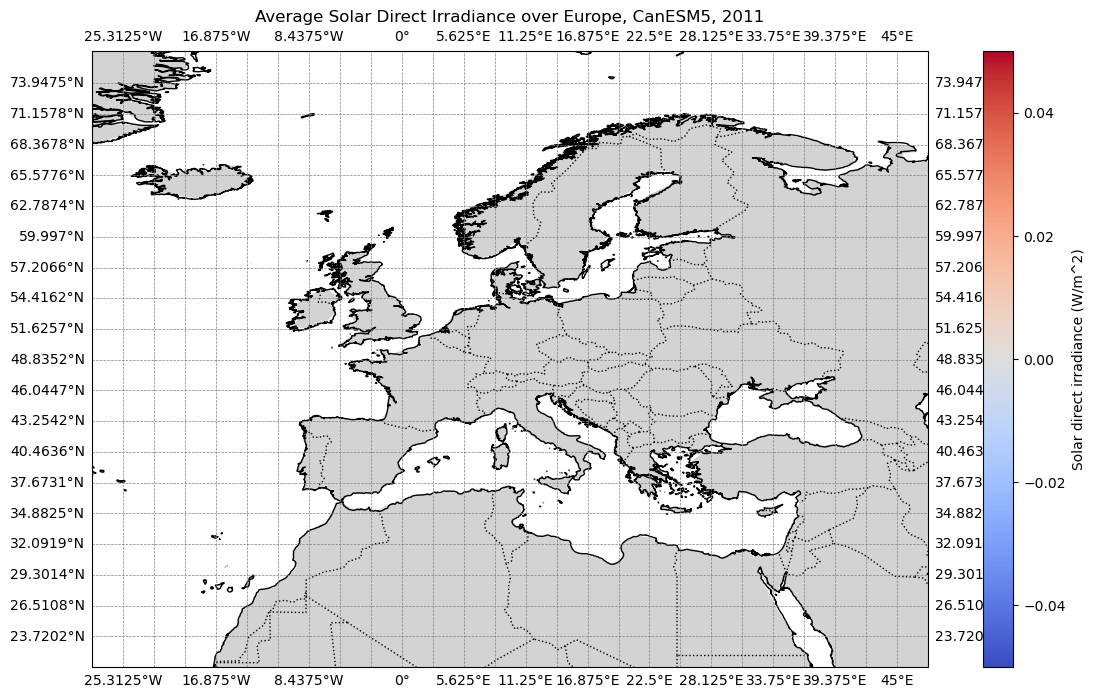

In [19]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Extract the longitude and latitude from the dataset
lon = rsds_mean_2011.lon
lat = rsds_mean_2011.lat

# Create the figure and axes with a PlateCarree projection
fig, ax = plt.subplots(figsize=(14, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the solar irradiance at the selected time
tas_mean_2011.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for solar irradiance
    cbar_kwargs={'label': 'Solar direct irradiance (W/m^2)'}
)

# Add map features for context
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')

# Set extent to Europe using the min and max of the lon and lat from the data
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()])

# Add gridlines for each latitude and longitude
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', xlocs=lon, ylocs=lat, x_inline=False, y_inline=False)

# Add title and labels
plt.title(f'Average Solar Direct Irradiance over Europe, CanESM5, 2011')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()